We are assisting the music industry to pinpoint the exact features to create top streaming music. These findings will help determine any trends that help produce a top streaming music/songs.

Question 1: What features have been most prevalent in the past 10 years for a top streaming music/song?

In [87]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


In [88]:
#read in csv files

songs_w_features_df = pd.read_csv("data.csv")



In [89]:
# data clean songs data frame to reduce columns

songs_w_features_df_reduced = songs_w_features_df[["acousticness", "artists", "danceability", "energy", "liveness",
                                                    "loudness", "name", "popularity", "tempo", "year" ]]

songs_w_features_df_reduced

,acousticness,artists,danceability,energy,liveness,loudness,name,popularity,tempo,year
0,0.9950,['Carl Woitschach'],0.708,0.1950,0.1510,-12.428,Singende Bataillone 1. Teil,0,118.469,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,0.0135,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,83.972,1928
2,0.6040,['Seweryn Goszczyński'],0.749,0.2200,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,107.177,1928
3,0.9950,['Francisco Canaro'],0.781,0.1300,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,108.003,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,0.2040,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,62.149,1928
...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,0.4430,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,100.012,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,0.3850,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,128.000,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,0.5390,0.1080,-9.332,How Would I Know,70,123.700,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,0.7610,0.2220,-2.557,I Found You,70,129.916,2020


In [90]:
# filter df to show songs after 2010

filter_songs_w_features = songs_w_features_df_reduced[songs_w_features_df_reduced["year"] >= 2010]

filter_songs_w_features

,acousticness,artists,danceability,energy,liveness,loudness,name,popularity,tempo,year
7054,0.022200,['Tame Impala'],0.450,0.849,0.0792,-5.075,Expectation,48,139.925,2010
7055,0.000103,['Bring Me The Horizon'],0.382,0.943,0.3960,-5.434,It Never Ends,50,105.032,2010
7056,0.852000,['Daft Punk'],0.179,0.167,0.1060,-23.408,Solar Sailer,48,124.266,2010
7057,0.080900,['TobyMac'],0.507,0.770,0.2140,-5.018,City On Our Knees,48,155.945,2010
7058,0.002960,['Kenny Chesney'],0.315,0.925,0.1140,-4.507,Reality,47,185.305,2010
...,...,...,...,...,...,...,...,...,...,...
169904,0.173000,"['DripReport', 'Tyga']",0.875,0.443,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,100.012,2020
169905,0.016700,"['Leon Bridges', 'Terrace Martin']",0.719,0.385,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,128.000,2020
169906,0.538000,"['Kygo', 'Oh Wonder']",0.514,0.539,0.1080,-9.332,How Would I Know,70,123.700,2020
169907,0.071400,"['Cash Cash', 'Andy Grammer']",0.646,0.761,0.2220,-2.557,I Found You,70,129.916,2020


In [91]:
#reset index

new_index_features = filter_songs_w_features.reset_index(drop=True)

In [92]:
#sort by popularity

sorted_df = new_index_features.sort_values("popularity")

sorted_df



,acousticness,artists,danceability,energy,liveness,loudness,name,popularity,tempo,year
15076,0.13500,['A Boogie Wit da Hoodie'],0.698,0.572,0.1540,-7.735,Bleed,0,71.446,2020
3262,0.35700,['Jack Johnson'],0.856,0.418,0.1110,-7.375,Better Together,0,110.093,2020
5472,0.03700,"['Luis Fonsi', 'Demi Lovato']",0.713,0.916,0.0681,-3.310,Échame La Culpa,0,95.996,2020
9690,0.01090,"['Jax Jones', 'Ina Wroldsen']",0.695,0.820,0.0605,-4.985,Breathe,0,125.881,2020
2183,0.65100,"['Arijit Singh', 'Shreya Ghoshal']",0.614,0.711,0.0862,-8.425,Balir Shohor Female,0,107.961,2020
...,...,...,...,...,...,...,...,...,...,...
11760,0.30500,"['BENEE', 'Gus Dapperton']",0.863,0.631,0.1230,-4.689,Supalonely,95,128.977,2019
11857,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,0.537,0.1570,-7.648,THE SCOTTS,96,129.979,2020
11865,0.73100,"['Powfu', 'beabadoobee']",0.726,0.431,0.6960,-8.765,death bed (coffee for your head) (feat. beabad...,97,144.026,2020
11856,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,0.690,0.1010,-7.956,ROCKSTAR (feat. Roddy Ricch),99,89.977,2020


In [93]:
#get all the years from the last 10 years

print(sorted_df['year'].unique())



[2020 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [94]:
#see all features
print(sorted_df.columns)


Index(['acousticness', 'artists', 'danceability', 'energy', 'liveness',
       'loudness', 'name', 'popularity', 'tempo', 'year'],
      dtype='object')


In [95]:
#group by year, top 5 per year


top_songs = sorted_df.groupby('year').apply(lambda x: x.sort_values(['popularity'], ascending=False).head(5))
top_songs = top_songs.drop('year', axis=1)
top_songs


acousticness                                            artists  \
year                                                                          
2010 10856       0.18500                                          ['Train']   
     10862       0.24100                              ['Eminem', 'Rihanna']   
     10861       0.09910                                          ['Kesha']   
     10857       0.01510                                     ['Bruno Mars']   
     10864       0.01620                                     ['Kanye West']   
2011 10957       0.14500                              ['Foster The People']   
     10956       0.00847                                      ['Grouplove']   
     10978       0.19200          ['Pitbull', 'Ne-Yo', 'Afrojack', 'Nayer']   
     10958       0.05310                                        ['J. Cole']   
     10965       0.30900                                ['Christina Perri']   
2012 11060       0.02910                        ['Macklemore & Ryan Lewis']   
     11057       0.93200                                     ['Bruno Mars']   
     11073       0.34600                             ['P!nk', 'Nate Ruess']   
     11070       0.04900                                     ['Bruno Mars']   
     11077       0.00900                                  ['One Direction']   
2013 11159       0.92200                                    ['John Legend']   
     11162       0.00380                                         ['Avicii']   
     11165       0.18600                                 ['Arctic Monkeys']   
     11168       0.22500                                  ['One Direction']   
     11158       0.04950                              ['The Neighbourhood']   
2014 11284       0.60700                                     ['Ed Sheeran']   
     11276       0.47400                                     ['Ed Sheeran']   
     11272       0.52900                                      ['Sam Smith']   
     11311       0.10100                  ['Aaron Smith', 'Krono', 'Luvli']   
     11261       0.58800                                      ['Sam Smith']   
2015 11356       0.61200                               ['Melanie Martinez']   
     11357       0.01150                                    ['Tame Impala']   
     11367       0.04620                              ['Twenty One Pilots']   
     11358       0.03710                                         ['WILLOW']   
     11381       0.36900                    ['Wiz Khalifa', 'Charlie Puth']   
2016 11456       0.08470                                   ['Travis Scott']   
     11462       0.41400                     ['The Chainsmokers', 'Halsey']   
     11460       0.69500                                   ['James Arthur']   
     11463       0.14100                        ['The Weeknd', 'Daft Punk']   
     11457       0.06890                                    ['Post Malone']   
2017 11576       0.06220                                ['Imagine Dragons']   
     11556       0.46900                                   ['XXXTENTACION']   
     11580       0.16300                                     ['Ed Sheeran']   
     11569       0.79100  ['Erik Eriksson', 'White Noise Baby Sleep', 'W...   
     11615       0.58100                                     ['Ed Sheeran']   
2018 11658       0.00513                                   ['Travis Scott']   
     11657       0.12300                                  ['Trevor Daniel']   
     11656       0.34900                                     ['Juice WRLD']   
     11663       0.93400                        ['Billie Eilish', 'Khalid']   
     11664       0.25800                                   ['XXXTENTACION']   
2019 11760       0.30500                         ['BENEE', 'Gus Dapperton']   
     11756       0.10400                                    ['Roddy Ricch']   
     11768       0.06860                            ['Surf Mesa', 'Emilee']   
     11774       0.69200                                    ['

In [96]:
top_songs.describe()

,acousticness,danceability,energy,liveness,loudness,popularity,tempo
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,0.281603,0.664382,0.614680,0.187515,-6.462691,85.818182,113.106036
std,0.270509,0.160450,0.196764,0.164359,3.566008,5.891271,30.334678
min,0.001460,0.000000,0.003420,0.059600,-28.460000,78.000000,0.000000
25%,0.057650,0.599500,0.467500,0.093700,-7.421500,82.000000,94.003000
50%,0.192000,0.689000,0.631000,0.123000,-5.849000,84.000000,116.879000
75%,0.441500,0.770000,0.740500,0.206500,-4.717500,90.000000,129.000000
max,0.934000,0.896000,0.939000,0.790000,-2.494000,100.000000,186.003000


In [97]:

# Calculate summary statistics per year, for top 5 songs
grouped = top_songs.groupby('name')[['acousticness', 'danceability', 'energy','liveness', 'loudness','tempo']].agg(['mean', 'median', 'std', 'min', 'max'])

grouped




acousticness               \
                                                           mean   median std   
name                                                                           
A Thousand Years                                        0.30900  0.30900 NaN   
All of Me                                               0.92200  0.92200 NaN   
Believer                                                0.06220  0.06220 NaN   
Blinding Lights                                         0.00146  0.00146 NaN   
Can't Hold Us - feat. Ray Dalton                        0.02910  0.02910 NaN   
Clean White Noise - Loopable with no fade               0.79100  0.79100 NaN   
Closer                                                  0.41400  0.41400 NaN   
Dance Monkey                                            0.69200  0.69200 NaN   
Dancin (feat. Luvli) - Krono Remix                      0.10100  0.10100 NaN   
Do I Wanna Know?                                        0.18600  0.18600 NaN   
Falling                                                 0.12300  0.12300 NaN   
Give Me Everything (feat. Ne-Yo, Afrojack & Nayer)      0.19200  0.19200 NaN   
Hey, Soul Sister                                        0.18500  0.18500 NaN   
I Fall Apart                                            0.06890  0.06890 NaN   
I'm Not The Only One                                    0.52900  0.52900 NaN   
Jocelyn Flores                                          0.46900  0.46900 NaN   
Just Give Me a Reason (feat. Nate Ruess)                0.34600  0.34600 NaN   
Just the Way You Are                                    0.01510  0.01510 NaN   
Locked out of Heaven                                    0.04900  0.04900 NaN   
Love The Way You Lie                                    0.24100  0.24100 NaN   
Lucid Dreams                                            0.34900  0.34900 NaN   
POWER                                                   0.01620  0.01620 NaN   
Perfect                                                 0.16300  0.16300 NaN   
Photograph                                              0.60700  0.60700 NaN   
Play Date                                               0.61200  0.61200 NaN   
Pumped Up Kicks                                         0.14500  0.14500 NaN   
ROCKSTAR (feat. Roddy Ricch)                            0.24700  0.24700 NaN   
SAD!                                                    0.25800  0.25800 NaN   
SICKO MODE                                              0.00513  0.00513 NaN   
Say So                                                  0.25600  0.25600 NaN   
Say You Won't Let Go                                    0.69500  0.69500 NaN   
See You Again (feat. Charlie Puth)                      0.36900  0.36900 NaN   
Shape of You                                            0.58100  0.58100 NaN   
Starboy                                                 0.14100  0.14100 NaN   
Stay With Me                                            0.58800  0.58800 NaN   
Story of My Life                                        0.22500  0.22500 NaN   
Stressed Out                                            0.04620  0.04620 NaN   
Supalonely                                              0.30500  0.30500 NaN   
Sweater Weather                                         0.04950  0.04950 NaN   
THE SCOTTS                                              0.23300  0.23300 NaN   
The Box                                                 0.10400  0.10400 NaN   
The Less I Know The Better                              0.01150  0.01150 NaN   
Thinking out Loud                                       0.47400  0.47400 NaN   
TiK ToK                                                 0.09910  0.09910 NaN   
Tongue Tied                                             0.00847  0.00847 NaN   
Toosie Slide                                            0.32100  0.32100 NaN   
Wait a Minute!                                          0.03710  0.03710 NaN   
Wake Me Up                                         

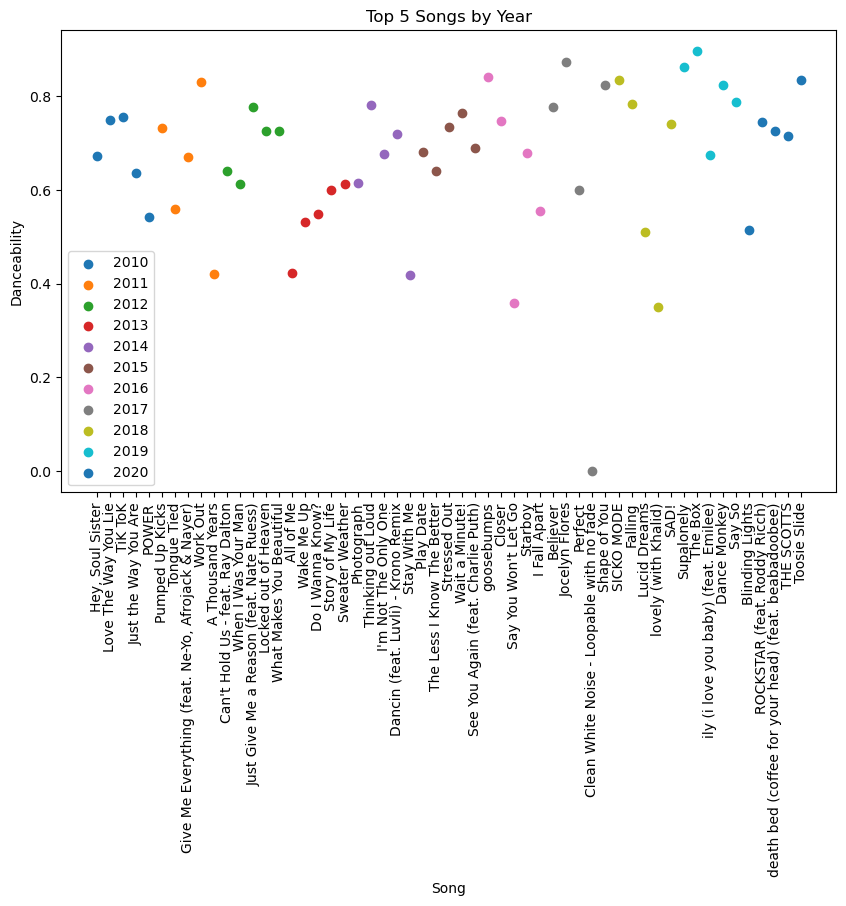

In [104]:

# danceablity

#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# loop through each year and plot the danceability scores for the top 5 songs
for i, year in enumerate(top_songs.index.levels[0]):
    year_data = top_songs.loc[year]
    ax.scatter(year_data['name'], year_data['danceability'], label=year, marker='o')

   

# set the x-tick labels to be rotated 90 degrees
plt.xticks(rotation=90)

# set the x-axis and y-axis labels, and the title
plt.xlabel('Song')
plt.ylabel('Danceability')
plt.title('Top 5 Songs by Year')

# show the legend
ax.legend()

# display the plot
plt.show()

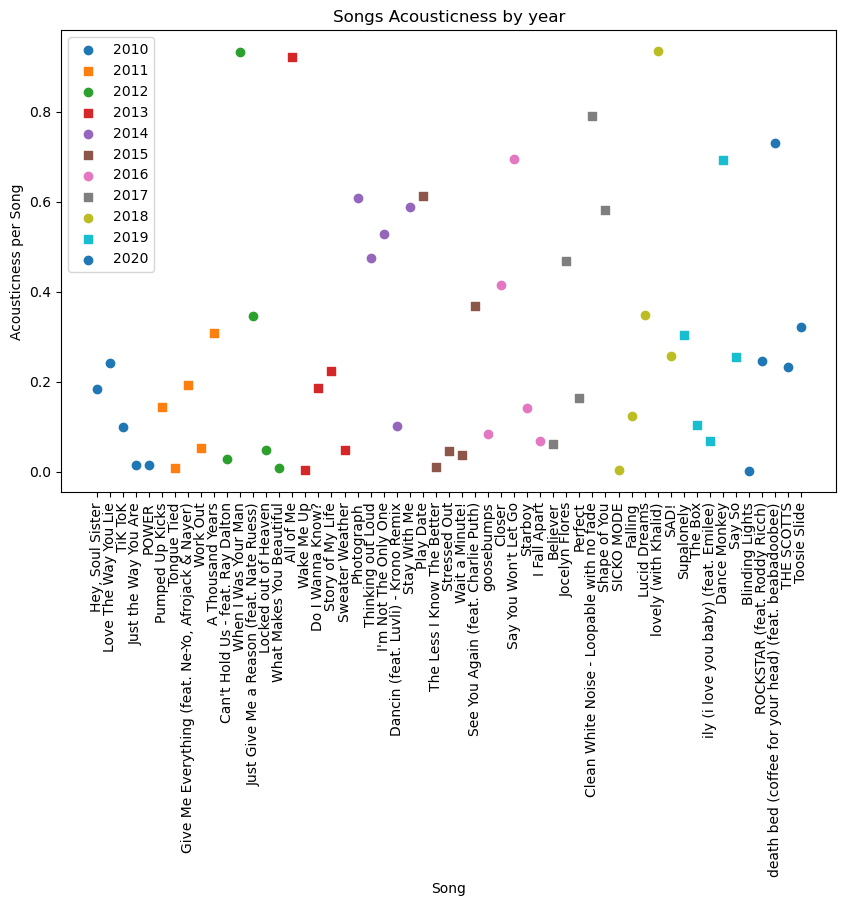

In [99]:
# acoustiness

#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# loop through each year and plot the danceability scores for the top 5 songs
for i, year in enumerate(top_songs.index.levels[0]):
    year_data = top_songs.loc[year]
    ax.scatter(year_data['name'], year_data['acousticness'], label=year, marker='o' if i % 2 == 0 else 's')

# set the x-tick labels to be rotated 90 degrees
plt.xticks(rotation=90)

# set the x-axis and y-axis labels, and the title
plt.xlabel('Song')
plt.ylabel('Acousticness per Song')
plt.title('Songs Acousticness by year')

# show the legend
ax.legend()

# display the plot
plt.show()

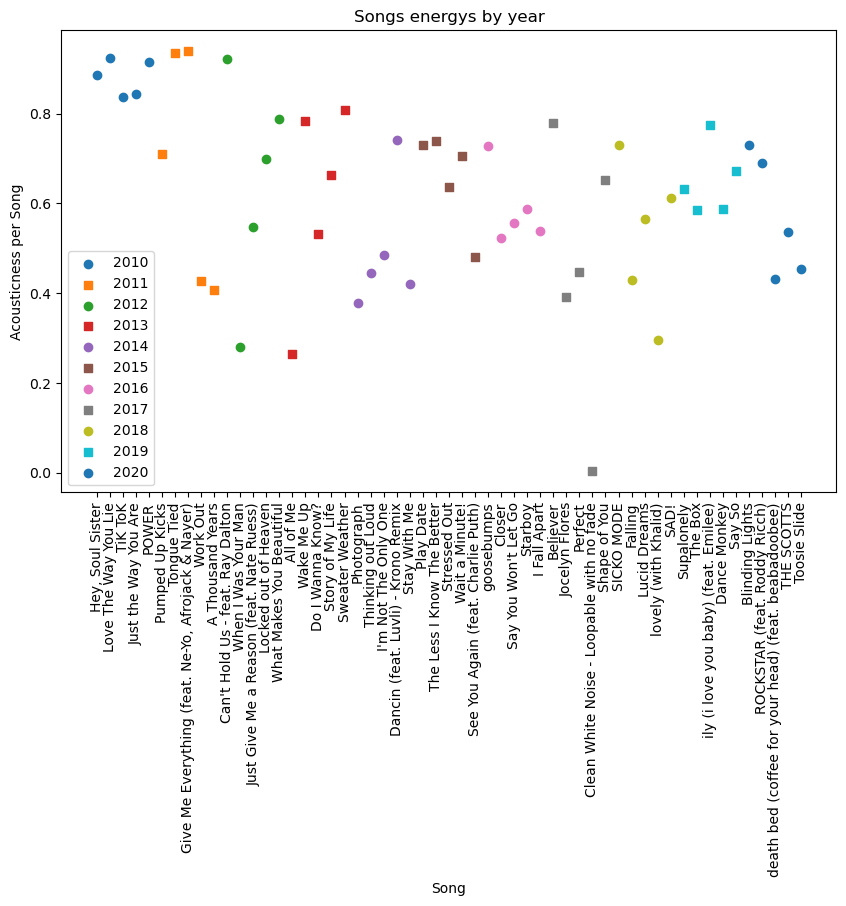

In [100]:
# energy

#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# loop through each year and plot the danceability scores for the top 5 songs
for i, year in enumerate(top_songs.index.levels[0]):
    year_data = top_songs.loc[year]
    ax.scatter(year_data['name'], year_data['energy'], label=year, marker='o' if i % 2 == 0 else 's')

# set the x-tick labels to be rotated 90 degrees
plt.xticks(rotation=90)

# set the x-axis and y-axis labels, and the title
plt.xlabel('Song')
plt.ylabel('Acousticness per Song')
plt.title('Songs energys by year')

# show the legend
ax.legend()

# display the plot
plt.show()

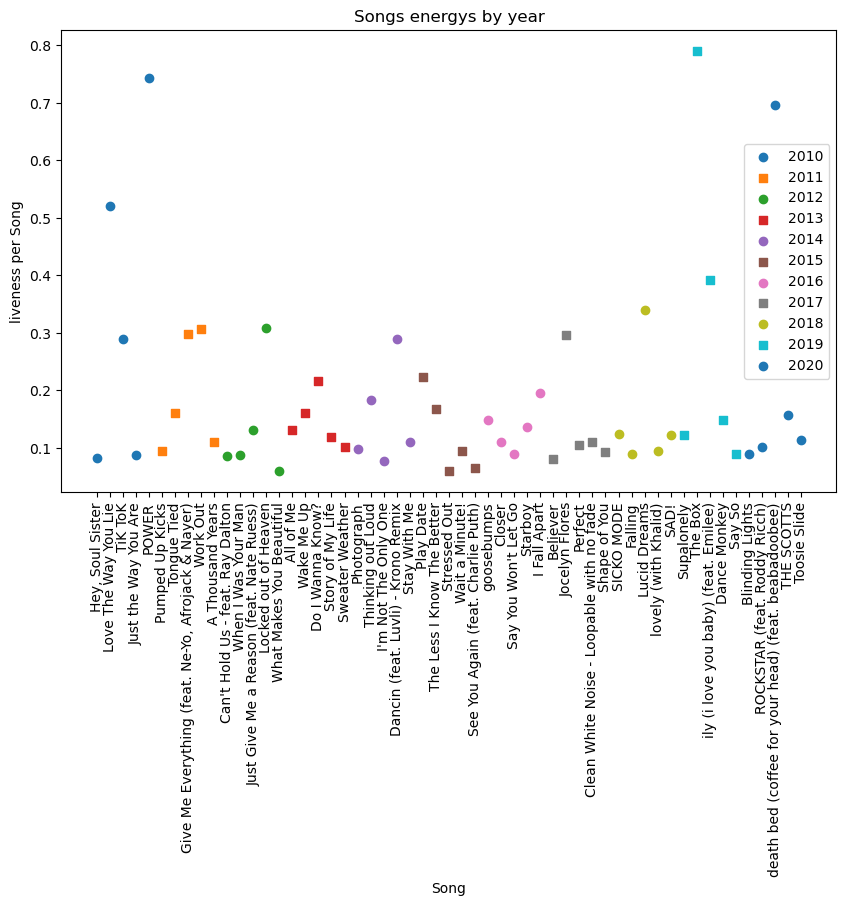

In [101]:
# liveness

#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# loop through each year and plot the danceability scores for the top 5 songs
for i, year in enumerate(top_songs.index.levels[0]):
    year_data = top_songs.loc[year]
    ax.scatter(year_data['name'], year_data['liveness'], label=year, marker='o' if i % 2 == 0 else 's')

# set the x-tick labels to be rotated 90 degrees
plt.xticks(rotation=90)

# set the x-axis and y-axis labels, and the title
plt.xlabel('Song')
plt.ylabel('liveness per Song')
plt.title('Songs energys by year')

# show the legend
ax.legend()

# display the plot
plt.show()

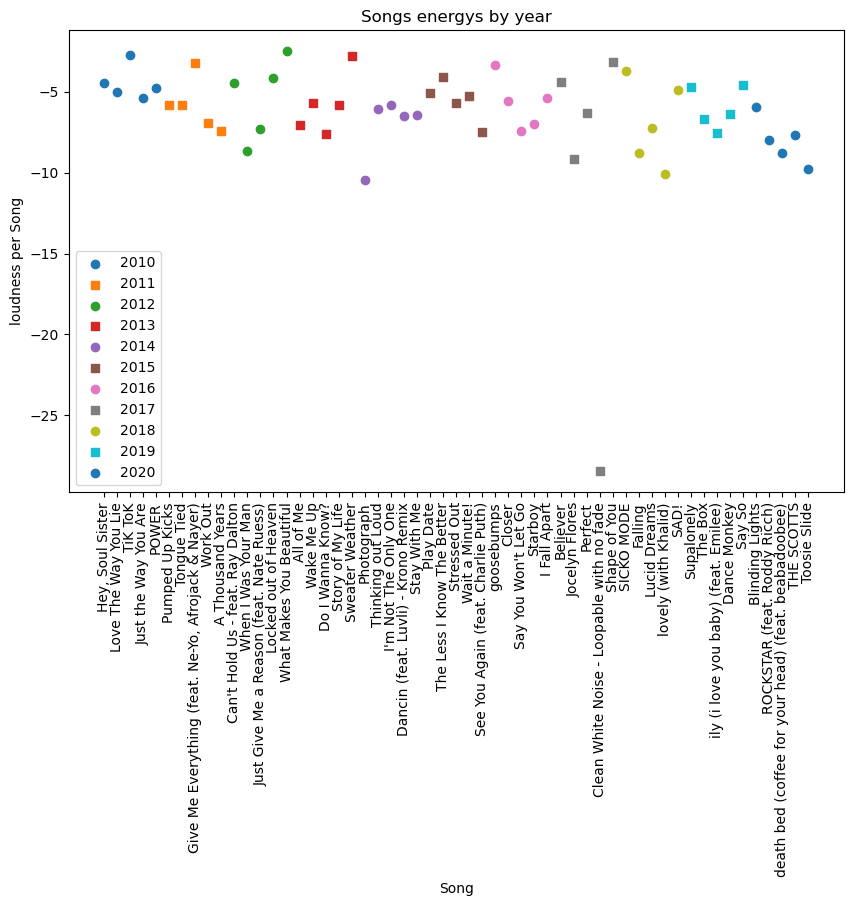

In [102]:
# loudness

#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# loop through each year and plot the danceability scores for the top 5 songs
for i, year in enumerate(top_songs.index.levels[0]):
    year_data = top_songs.loc[year]
    ax.scatter(year_data['name'], year_data['loudness'], label=year, marker='o' if i % 2 == 0 else 's')

# set the x-tick labels to be rotated 90 degrees
plt.xticks(rotation=90)

# set the x-axis and y-axis labels, and the title
plt.xlabel('Song')
plt.ylabel('loudness per Song')
plt.title('Songs energys by year')

# show the legend
ax.legend()

# display the plot
plt.show()

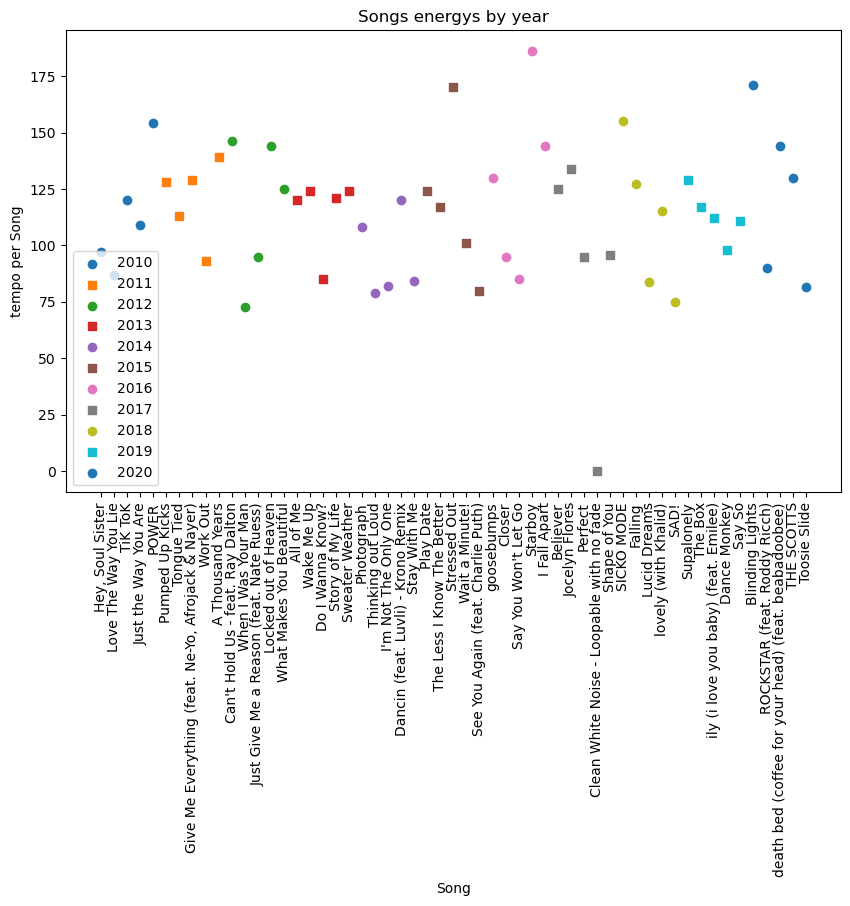

In [103]:

# tempo

#create figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# loop through each year and plot the danceability scores for the top 5 songs
for i, year in enumerate(top_songs.index.levels[0]):
    year_data = top_songs.loc[year]
    ax.scatter(year_data['name'], year_data['tempo'], label=year, marker='o' if i % 2 == 0 else 's')

# set the x-tick labels to be rotated 90 degrees
plt.xticks(rotation=90)

# set the x-axis and y-axis labels, and the title
plt.xlabel('Song')
plt.ylabel('tempo per Song')
plt.title('Songs energys by year')

# show the legend
ax.legend()

# display the plot
plt.show()